Making animated plots of simulation trajectory data

1. Plotting ice fraction as a function of temperature, with a time ticker in the corner
2. Adding the rendered graphics from Ovito into the figure

Next stage: Plotting density profile, and deltaV, as a function of distance from the substrate

1. Make data file from the dump files: 
    Timestep, R1, R2, R3 .....
    [step], [density at R1], [density at R2], .....
2. Plot vertically with time and temperature ticker in the corner
3. Add the rendered graphics from Ovito to the figure

Logistics:

Script should be modular -> specify which run to use
Script will go into the specific run folder and find the data
Inside the run folder should already be a folder containing all the rendered Ovito frames (this needs to be done ahead of time)

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
import matplotlib.image as mpimg

%matplotlib notebook

test_data = "mW/1_atm/analysis/test_1/ice_ratio.dat"

ice_ratio = pd.read_csv(test_data, sep='\t', header=None, names=['timestep','time (ns)','temperature (K)','ice', 'liquid', 'total', 'ice/total'])

print(ice_ratio.head())



   timestep  time (ns)  temperature (K)  ice  liquid  total  ice/total
0         0       0.00          225.000  781    3195   3976   0.196429
1      1000       0.01          224.998  730    3246   3976   0.183602
2      2000       0.02          224.995  710    3266   3976   0.178571
3      3000       0.03          224.993  742    3234   3976   0.186620
4      4000       0.04          224.990  709    3267   3976   0.178320


<IPython.core.display.Javascript object>


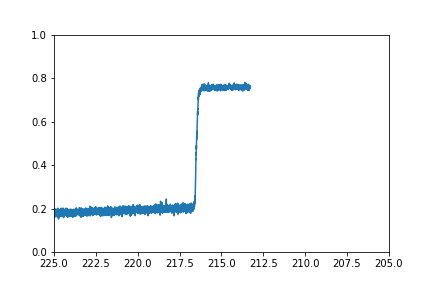

In [58]:
fig, ax = plt.subplots()

ax.set_xlim(225, 205)
ax.set_ylim(0, 1)

init = ice_ratio.iloc[:int(1)] #select data range
x = init['temperature (K)']
y = init['ice/total']
line, = ax.plot(x, y)


def animate(i):
    data = ice_ratio.iloc[:int(i+1)] #select data range
    x = data['temperature (K)']
    y = data['ice/total']
    line.set_xdata(x)  # update the data.
    line.set_ydata(y)
    return line,

frames=np.arange(0, 8000, 10)

ani = animation.FuncAnimation(
    fig, animate, frames, interval=10, blit=True, save_count=50)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()

<IPython.core.display.Javascript object>


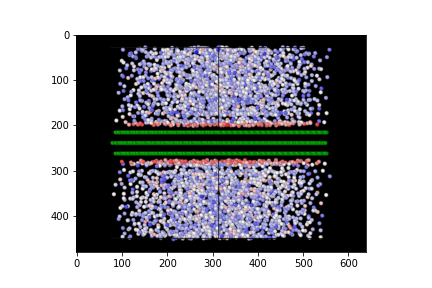

In [59]:
%matplotlib notebook

test_mov = "mW/1_atm/analysis/test_1/animation_frames"
mov_frames = {}

for n in frames:
    filename = test_mov+'/mW_1atm_test1%s.png' % f"{n:04}"
    #print(filename)
    img = mpimg.imread(filename)
    mov_frames[n]=img

    
mov, ax = plt.subplots()
ax.imshow(mov_frames[0])
    
def animate(i):
    ax.imshow(mov_frames[i])
    
    
ani = animation.FuncAnimation(mov, animate, frames, interval=10, blit=True,
                                repeat_delay=1000)

plt.show()

<IPython.core.display.Javascript object>


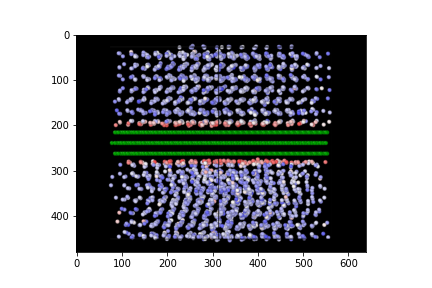

In [60]:
#alternative method

for n in frames:
    filename = test_mov+'/mW_1atm_test1%s.png' % f"{n:04}"
    #print(filename)
    img = mpimg.imread(filename)
    mov_frames[n]=img

    
mov, ax = plt.subplots()
ax.imshow(mov_frames[0])
    
ims = []
for i in frames:
    im = ax.imshow(mov_frames[i], animated=True)
    if i == 0:
        ax.imshow(mov_frames[i])  # show an initial one first
    ims.append([im])

ani = animation.ArtistAnimation(mov, ims, interval=10, blit=True,
                                repeat_delay=1000)

#plt.show()

<IPython.core.display.Javascript object>


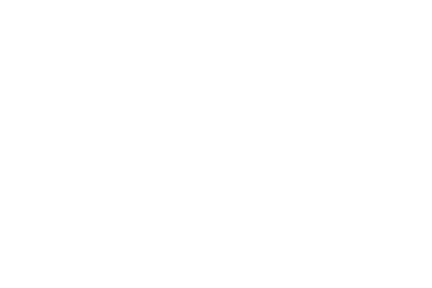

In [61]:
# plot movie and data together!
%matplotlib notebook

#fig2, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 2]})
fig2 = plt.figure()
ax1 = fig2.add_subplot(2, 1, 1)
ax2 = fig2.add_subplot(2, 1, 2)


ax1.imshow(mov_frames[0])
      
ax2.set_xlim(225, 205)
ax2.set_ylim(0, 1)

init = ice_ratio.iloc[:int(1)] #select data range
x = init['temperature (K)']
y = init['ice/total']
line, = ax2.plot(x, y)


def animate(i):
    ax1.imshow(mov_frames[i])
    data = ice_ratio.iloc[:int(i+1)] #select data range
    x = data['temperature (K)']
    y = data['ice/total']
    line.set_xdata(x)  # update the data.
    line.set_ydata(y)
    return line,

ani = animation.FuncAnimation(fig2, animate, frames, interval=10, blit=True, save_count=50)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

#plt.show()

<IPython.core.display.Javascript object>


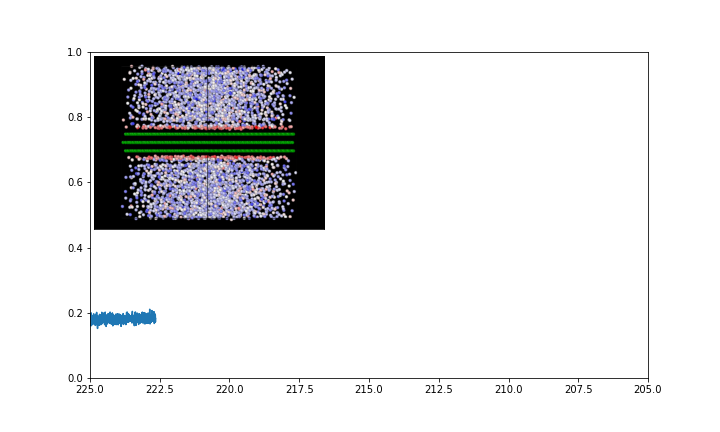

In [62]:
# plot movie and data together as an inset!
%matplotlib notebook

#fig2, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 2]})
fig3, ax = plt.subplots(figsize=(10,6))
      
ax.set_xlim(225, 205)
ax.set_ylim(0, 1)

init = ice_ratio.iloc[:int(1)] #select data range
x = init['temperature (K)']
y = init['ice/total']
line, = ax.plot(x, y)

inset = fig3.add_axes([0.09, 0.47, .4, .4])
inset.imshow(mov_frames[0])
plt.setp(inset, xticks=[], yticks=[])


def animate(i):
    inset.imshow(mov_frames[i])
    data = ice_ratio.iloc[:int(i+1)] #select data range
    x = data['temperature (K)']
    y = data['ice/total']
    line.set_xdata(x)  # update the data.
    line.set_ydata(y)
    return line,

ani = animation.FuncAnimation(fig3, animate, frames, interval=10, blit=True, save_count=50)

# To save the animation, use e.g.
#
ani.save("animation_test.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()